In [112]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp


In [123]:
def drawStockEvol(t, xs, stock):
    plt.figure(figsize = (12, 4))
    for x in xs:
        plt.plot(t, x)
    plt.xlabel('Year')
    plt.ylabel(stock)
    plt.show()

# Population Growth Models

In [94]:
p_init = 1.65e9
BR = 0.04
DR = 0.02
K = 12e9
K0 = 1e9
a = 0.02
t_eval = np.arange(0, 130, 1)

## Two-Dimensional (2D) Continuous Models
### Malthusian Model

The mathematical model representing the dynamics of the population is given by the initial value problem

$\frac{dP}{dt}=rP$, $P(t_0)=P_0$

where $r=b-d$ is called the intrinsic growth rate or reproduction rate

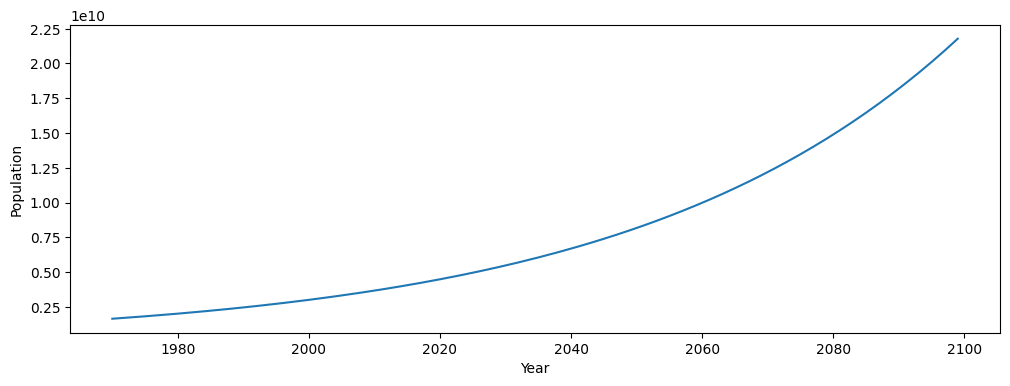

In [90]:
def dp_dt(t, p):
    return (BR - DR) * p

sol = solve_ivp(dp_dt, [0, 131], [p_init], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

This model is called the Malthusian model or an exponential model. It is
restrictive due to the following assumptions.
- The per capita growth rate (1/P) (AP/dt) is always a constant. That is, contribution due to an average individual is always a constant given by r and this contribution does not depend on the density of the population.
- The growth rate of the population dP/dt si always either increasing (ifr >0) or decreasing (ifr <0). The process is exponential growth (or exponential decay).
- The population grows (decays) exponentially from the initial value Po. The population will remain constant when the births and deaths balance each other, that is, $b=d$ or $r=0$.

### Verhulst-Pearl Logistic Model

The mathematical model representing the dynamics of the population is given by the initial value problem

$\frac{dP}{dt}=rP(1-\frac{P}{K})$, $P(t_0)=P_0$

where $K$ is called the carrying capacity of the environment, which is determined by the available sustaining resources.

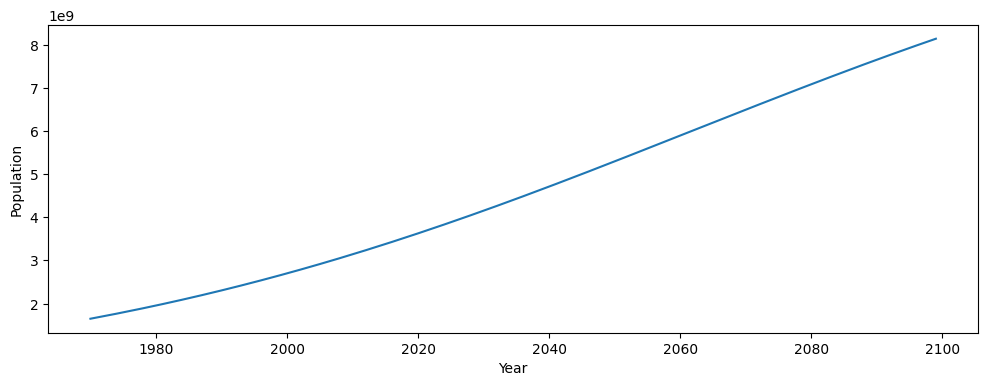

In [91]:
def dp_dt(t, p):
    return (BR - DR) * p * (1-p/K)

sol = solve_ivp(dp_dt, [0, 131], [p_init], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

When the population is small, that is, $P(t)$ is small, the second P can be neglected and the population grows exponentially. 

When $P(t)$ becomes large, the second term on the right-hand side dominates and the population decreases, thus providing a natural balancing of population. 

The solution of this equation is the S-shaped curve called the sigmoid curve

### Gompertz Growth Model

The mathematical model representing the dynamics of the population is given by the initial value problem

$\frac{dP}{dt}=re^{-at}P$, $P(t_0)=P_0$

where $K$ is called the carrying capacity of the environment, which is determined by the available sustaining resources.

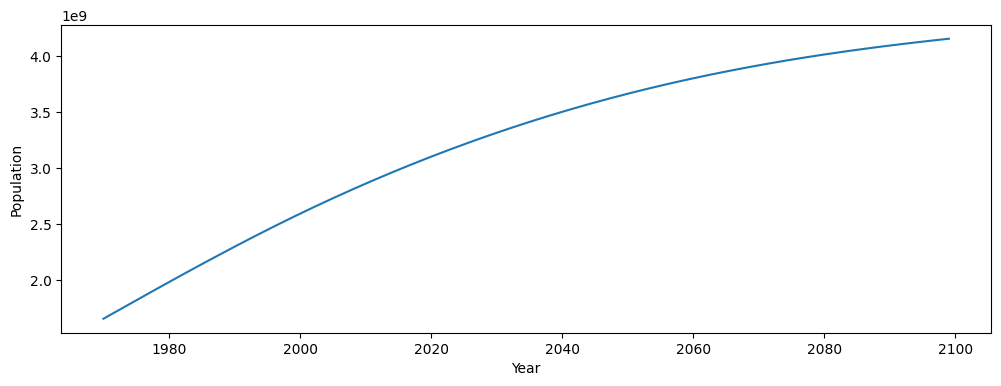

In [92]:
def dp_dt(t, p):
    return (BR - DR) * np.exp(-a*t) * p 

sol = solve_ivp(dp_dt, [0, 131], [p_init], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

### Model with Allee Effect

The mathematical model representing the dynamics of the population is given by the initial value problem

$\frac{dP}{dt}=rP(\frac{P}{K_0}-1)(1-\frac{P}{K})$, $P(t_0)=P_0$

where $K$ is called the carrying capacity of the environment, which is determined by the available sustaining resources.

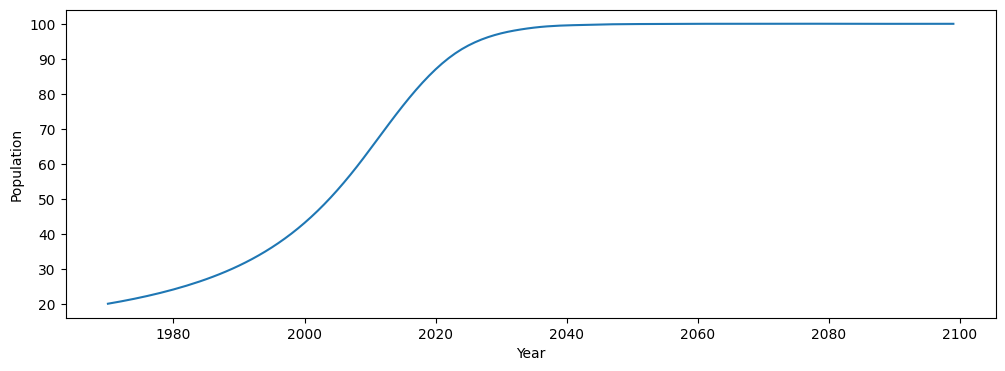

In [99]:
def dp_dt(t, p):
    K = 100
    K0 = 10
    return (BR - DR) * p * (p/K0 - 1) * (1-p/K)

P0 = 20
sol = solve_ivp(dp_dt, [0, 131], [P0], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

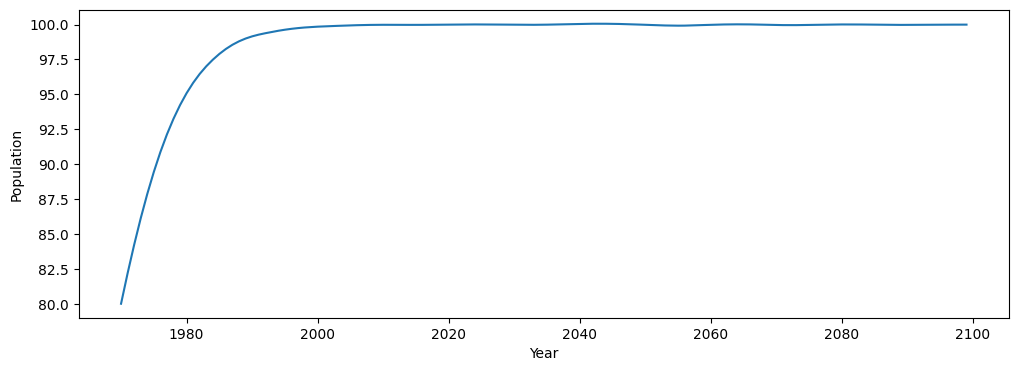

In [98]:
def dp_dt(t, p):
    K = 100
    K0 = 10
    return (BR - DR) * p * (p/K0 - 1) * (1-p/K)

P0 = 80
sol = solve_ivp(dp_dt, [0, 131], [P0], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

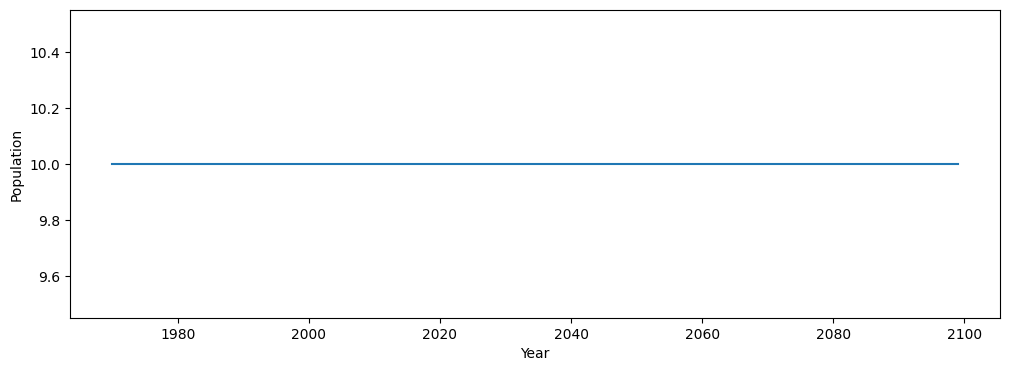

In [100]:
def dp_dt(t, p):
    K = 100
    K0 = 10
    return (BR - DR) * p * (p/K0 - 1) * (1-p/K)

P0 = 10
sol = solve_ivp(dp_dt, [0, 131], [P0], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

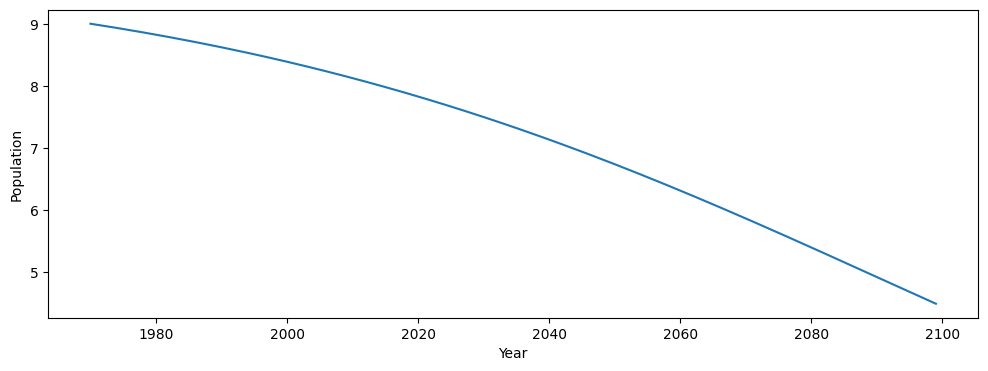

In [101]:
def dp_dt(t, p):
    K = 100
    K0 = 10
    return (BR - DR) * p * (p/K0 - 1) * (1-p/K)

P0 = 9
sol = solve_ivp(dp_dt, [0, 131], [P0], t_eval=t_eval)
drawStockEvol(sol.t + 1970, sol.y[0], 'Population')

If $P(0)=Po=m$,then $C=0$ and $P(t)=m$, which means that the population is stationary.

If $P(0) = P_0 > m$, then $0<C<1$. As $t \rightarrow \infty, P(t) \rightarrow K$, that is, the carrying capacity. Al the solution trajectories starting with initial values $P_0 > m$ converge ot the carrying capacity.

If $P(0) = P_0 < m$, then $C < 0$ and $P(t)$ become negative for small value of $P_0$. This implies that for $0<P_0<m, P(t)\rightarrow 0$, that is, the population becomes extinct.

## Two-Dimensional (2D) Continuous Models

$\frac{dX}{dt} = X f(X) - Y p(X,Y) = XF(X,Y)$

$\frac{dY}{dt} = -d Y + q Y p(X,Y) = YG(X,Y)$

where

$X$: Density of preys (resource, victim) population. $X \geq 0$.

$Y$: Density of predators (consumer, exploiter) population. $Y \geq 0$.

$f(X)$: Per capita growth rate of prey in the absence of predation.

$\delta$: Food-independent predator mortality, which is assumed ot be a constant.

$p(X,Y)$: Trophic function. It is called the functional response in the prey equation and numerical response in the predator equation.

$\theta$: Conversion efficiency or trophic efficiency.

$F, G$: Continuous and analytic functions in the domain $X \geq 0, Y \geq 0$.

In [ ]:
### 

In [121]:
alpha = 1. #mortality rate due to predators
beta = 1.
delta = 1.
gamma = 1.
params = [alpha, beta, delta, gamma]
x0 = 4.
y0 = 2.
vars = [x0, y0]

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [117]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

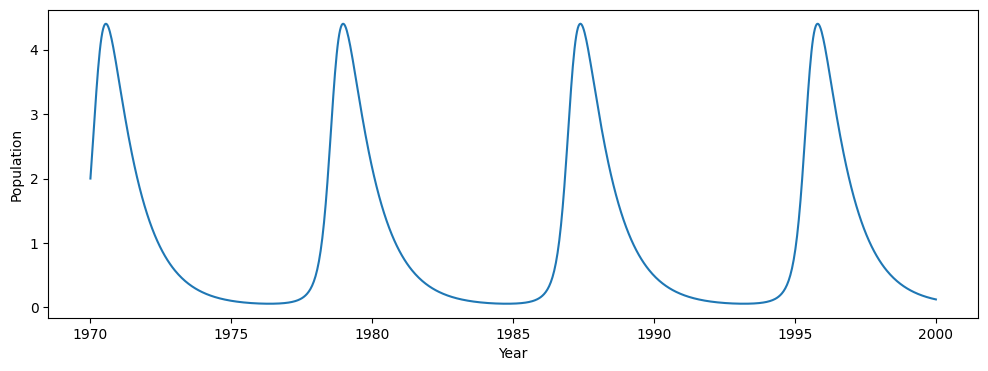

In [119]:
drawStockEvol(t + 1970, y, 'Population')

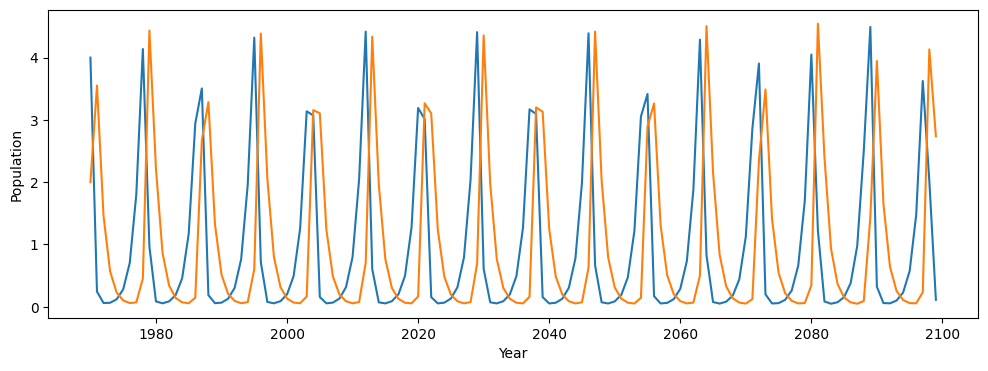

In [127]:
def dp_dt(t, X, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

sol = solve_ivp(dp_dt, [0, 131], vars, t_eval=t_eval, args=params)
drawStockEvol(sol.t + 1970, [sol.y[0], sol.y[1]], 'Population')